In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading file
df = pd.read_csv(r'C:\Projects\JN\dataset_sales orders\sales_data.csv')
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


In [17]:
#null values in dataframe
df.isnull().sum()

Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')

In [6]:
#Monthly_sales
monthly_sales = df.groupby('Month')['turnover'].sum()
monthly_sales.head()

Month
2019-01    1813586.44
2019-02    2202022.42
2019-03    2807100.38
2019-04    3390670.24
2019-05    3152606.75
Freq: M, Name: turnover, dtype: float64

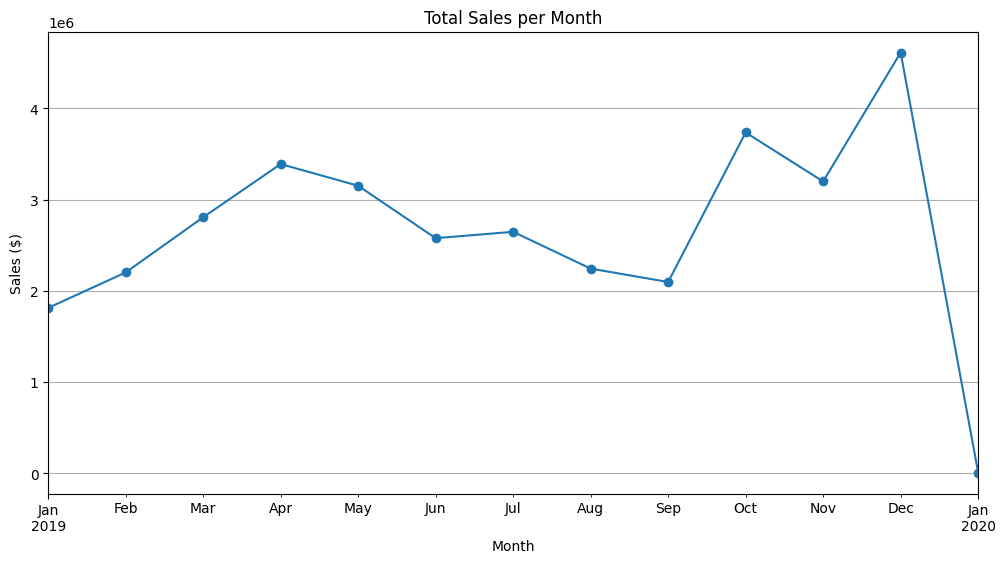

In [7]:
# Vizualization monthly_sales
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Sales per Month')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

In [8]:
#Top 5 products by revenue
top_5_products = df.groupby('Product')['turnover'].sum().sort_values(ascending = False).head()
top_5_products

Product
Macbook Pro Laptop        8037600.00
iPhone                    4794300.00
ThinkPad Laptop           4129958.70
Google Phone              3319200.00
27in 4K Gaming Monitor    2435097.56
Name: turnover, dtype: float64

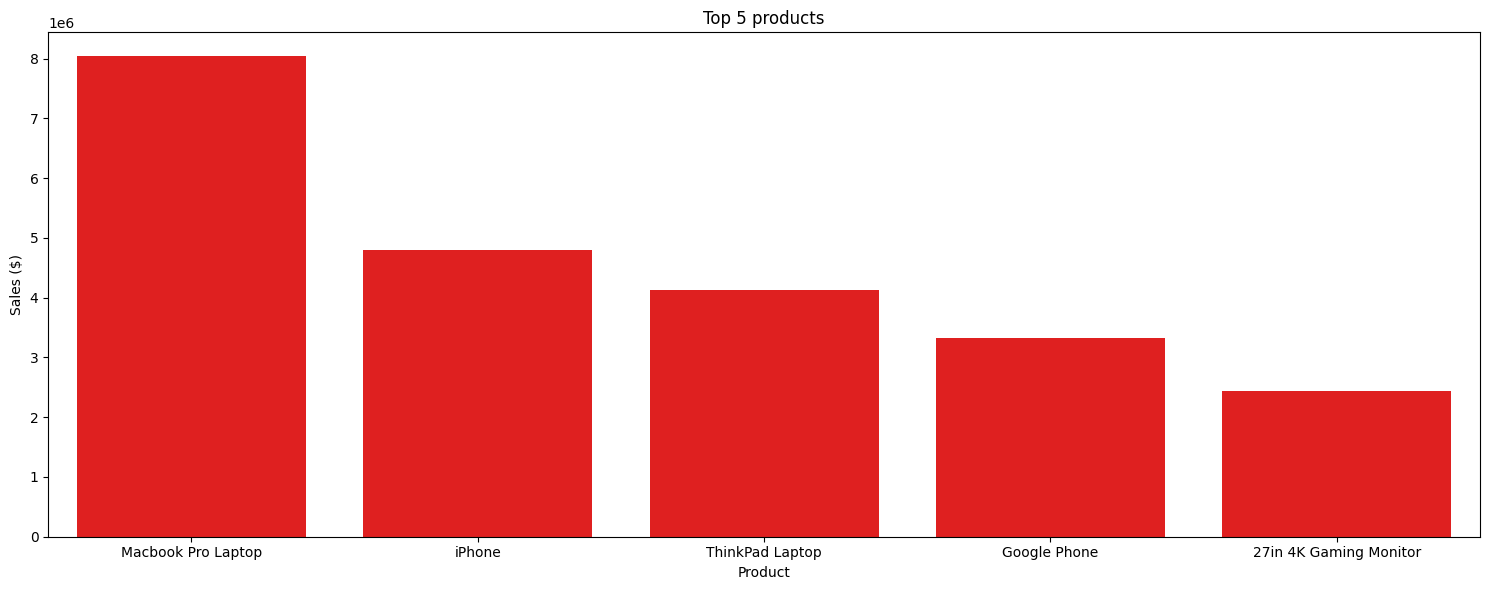

In [9]:
# Vizualization products by revenue
plt.figure(figsize=(15, 6))
sns.barplot(data=top_5_products, color = 'Red')

plt.title('Top 5 products')
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
#Sales by category
category_sales = df.groupby('catégorie')['turnover'].sum().reset_index()
category_sales

,catégorie,turnover
0,Alimentation,8612544.53
1,Sports,8670290.44
2,Vêtements,8601579.46
3,Électronique,8607621.54


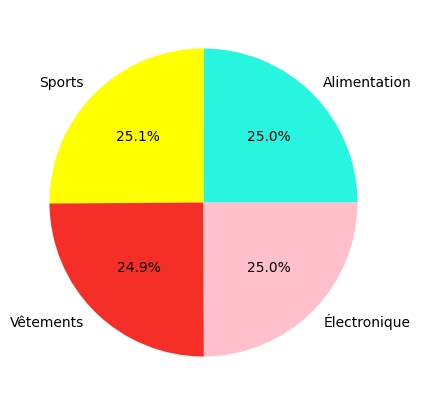

In [16]:
plt.figure(figsize = (12, 5))

colors_categories = ['#27F5E0', 'yellow', '#F52E27', 'pink']
plt.pie(data = category_sales,
        autopct= '%1.1f%%',
        x = 'turnover', 
        labels = 'catégorie', 
        colors = colors_categories)
plt.show()

In [84]:
#Popularity by products 
df.groupby(df['Product'])['Quantity Ordered'].sum().sort_values(ascending = False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [86]:
#Profit by products 
df.groupby(df['Product'])['margin'].sum().sort_values(ascending = False)

Product
Macbook Pro Laptop            5.385192e+06
iPhone                        3.212181e+06
ThinkPad Laptop               2.767072e+06
Google Phone                  2.223864e+06
27in 4K Gaming Monitor        1.631515e+06
34in Ultrawide Monitor        1.578224e+06
Flatscreen TV                 9.686190e+05
Apple Airpods Headphones      8.222025e+05
Bose SoundSport Headphones    6.727827e+05
Vareebadd Phone               5.542240e+05
27in FHD Monitor              3.963486e+05
LG Washing Machine            2.677320e+05
LG Dryer                      2.596920e+05
Lightning Charging Cable      1.735471e+05
20in Monitor                  1.589520e+05
USB-C Charging Cable          1.432506e+05
Wired Headphones              1.232392e+05
AA Batteries (4-pack)         5.305920e+04
AAA Batteries (4-pack)        4.637042e+04
Name: margin, dtype: float64